In [1]:
!pip install wheel
!pip install pipwin

!pipwin install numpy --user
!pipwin install pandas --user
!pipwin install shapely --user
!pipwin install gdal --user
!pipwin install fiona --user
!pipwin install pyproj --user
!pipwin install six --user
!pipwin install rtree --user
!pipwin install geopandas --user

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 605 kB 887 kB/s 
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25998 sha256=9687545d0cb6f89e54f56389cd35ad8c41f5c143e02c9be480a10acc353d62e3
  Stored in directory: /root/.cache/pip/wheels/2a/80/ac/dcd2bdbd03dd2b7b7e2bf3e5afbda6a1ab7935bbce314969da
Successfully built pyjsparser
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Usage:
  pipwin install (<package> | [-r=<file> | --file=<file>])
  pipwin uninstall <package>
  pipwin download (<package> | [-r=<file> | --file=<file>]) [-d=<dest> | --dest=<dest>]
  pipwin search <package>
  pipwin list
  pipwin refresh [--log=<log>]
  pipwin (-h | --help)
  pipwin (-v | --version)
Usage:
  pipwin install (<package> | [-r=<file> | --file=<file>])
  pipwin uninstall <package>
  pipwin download (<package> | [-r=<file> | 

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Import datetime
import datetime

In [3]:
# Read the data file
filepath = "https://github.com/washingtonpost/data-police-shootings/raw/master/fatal-police-shootings-data.csv"

data = pd.read_csv(filepath, index_col="name", parse_dates=["date"], error_bad_lines=False)

In [4]:
# Take a peek at the data
data.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
name,,,,,,,,,,,,,,,,
Tim Elliot,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
Lewis Lee Lembke,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
John Paul Quintero,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
Matthew Hoffman,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
Michael Rodriguez,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
# Convert the DataFrame to a GeoDataFrame
killings = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
killings.crs = {'init': 'epsg:4326'}


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
killings.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,geometry
name,,,,,,,,,,,,,,,,,
Tim Elliot,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,POINT (-123.12200 47.24700)
Lewis Lee Lembke,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,POINT (-122.89200 45.48700)
John Paul Quintero,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,POINT (-97.28100 37.69500)
Matthew Hoffman,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,POINT (-122.42200 37.76300)
Michael Rodriguez,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,POINT (-104.69200 40.38400)


In [7]:
# Drop the "id" column
data.drop("id", axis=1, inplace=True)

In [8]:
# Let's find out what each column is made of
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5818 entries, Tim Elliot to Cory Donell Truxillo
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     5818 non-null   datetime64[ns]
 1   manner_of_death          5818 non-null   object        
 2   armed                    5605 non-null   object        
 3   age                      5573 non-null   float64       
 4   gender                   5817 non-null   object        
 5   race                     5284 non-null   object        
 6   city                     5818 non-null   object        
 7   state                    5818 non-null   object        
 8   signs_of_mental_illness  5818 non-null   bool          
 9   threat_level             5818 non-null   object        
 10  flee                     5503 non-null   object        
 11  body_camera              5818 non-null   bool          
 12  longitude     

In [9]:
# Find the number of people killed in the past year
# Timestamp features
data = data.assign(day=data.date.dt.day,
                   month=data.date.dt.month,
                   year=data.date.dt.year)

In [10]:
data_id = data.reset_index()

In [11]:
# First, create a Series with a timestamp index
date = pd.Series(data_id .index, index=data_id .date, name="count_1_year").sort_index()
date.head()

date
2015-01-02    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-04    4
Name: count_1_year, dtype: int64

In [12]:
count_1_year = date.rolling("366d").count()

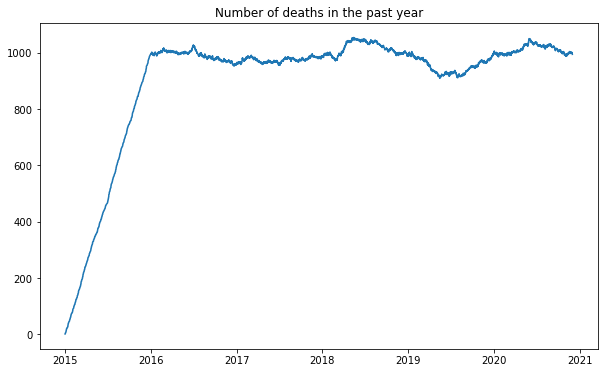

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(count_1_year)
plt.title("Number of deaths in the past year")

plt.show()

In [14]:
# Police Deaths in past year
count_1_year[-1]

995.0

In [15]:
# Number of shootings per year
# x-axis: months, y-axis: cummulative number of deaths
data.groupby("year").size()

year
2015    994
2016    961
2017    986
2018    990
2019    999
2020    888
dtype: int64

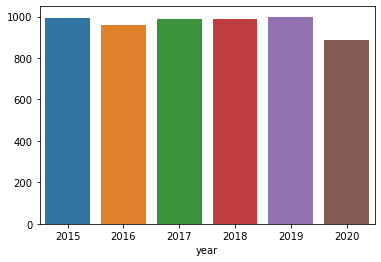

In [16]:
sns.barplot(y=data.groupby("year").size(), x=data.groupby("year").size().index)

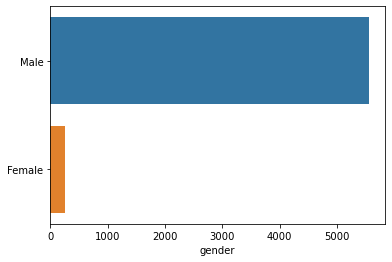

In [17]:
sns.barplot(x=data.gender.value_counts(), y=["Male", "Female"])

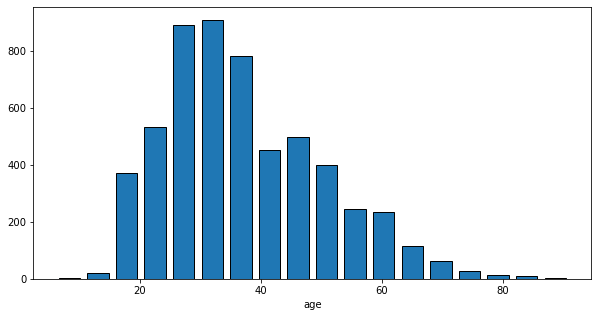

In [18]:
# Visualise age distribution 
plt.figure(figsize=(10, 5))

sns.distplot(data.age, kde=False, bins=18, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})

In [19]:
data_2020 = data[data.year==2020]

In [20]:
lockdown = data_2020[data_2020.month<=6]

In [21]:
len(lockdown)

523

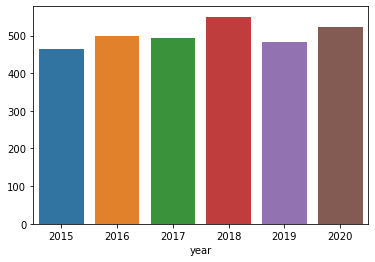

In [22]:
# Did the rate of killings increase during the pandamic 
sns.barplot(y=data[data.month<=6].groupby("year").size(), x=data.groupby("year").size().index)

``It stayed fairly constant - despite the lockdown``

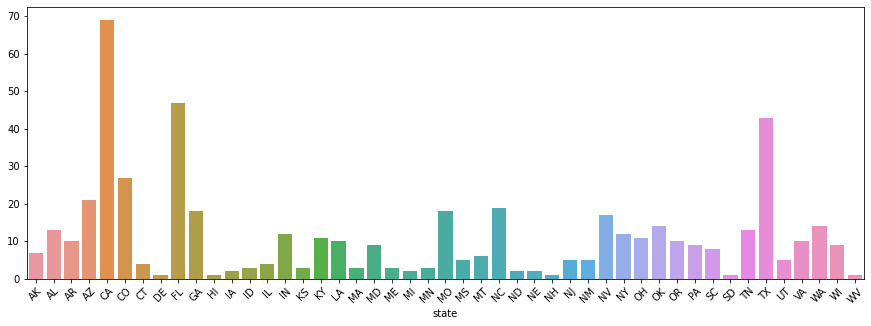

In [23]:
# How did lockdown affect the rate of police killings
plt.figure(figsize=(15, 5))
sns.barplot(y=lockdown.groupby("state").size(), x=lockdown.groupby("state").size().index)

plt.xticks(rotation=45)
# It will be useful to know which states went on lockdown

plt.show()

`??`

# How did the death of George Floyd affect the killings

In [24]:
after_GF = pd.Series(lockdown.reset_index()["date"].index, lockdown.reset_index()["date"])

In [25]:
after_GF.head()

date
2020-01-01    0
2020-01-01    1
2020-01-01    2
2020-01-01    3
2020-01-02    4
dtype: int64

In [26]:
after_GF.rolling("2d").count().head()

date
2020-01-01    1.0
2020-01-01    2.0
2020-01-01    3.0
2020-01-01    4.0
2020-01-02    5.0
dtype: float64

In [27]:
count_1_year = after_GF.rolling("7d").count()

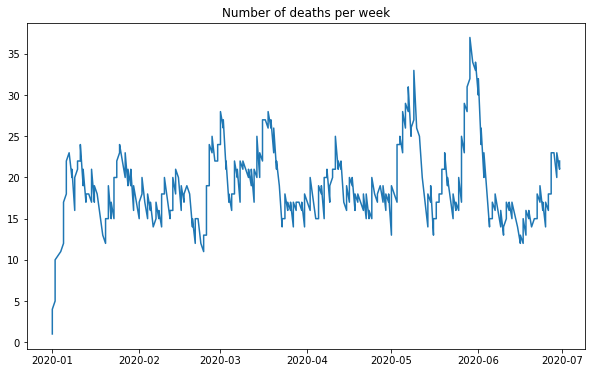

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(count_1_year)
plt.title("Number of deaths per week")

plt.show()

In [29]:
# Check the trend for black people

after_GF = pd.Series(lockdown[lockdown.race=="B"].reset_index()["date"].index, lockdown[lockdown.race=="B"].reset_index()["date"])

count_1_year = after_GF.rolling("7d").count()

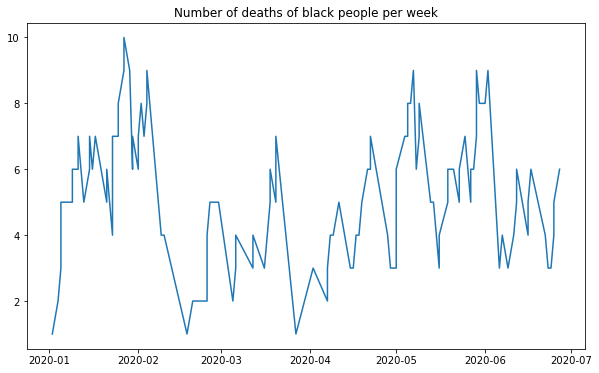

In [30]:
plt.figure(figsize=(10, 6))

plt.plot(count_1_year)
plt.title("Number of deaths of black people per week")

plt.show()

# In which states are blacks more likely to die

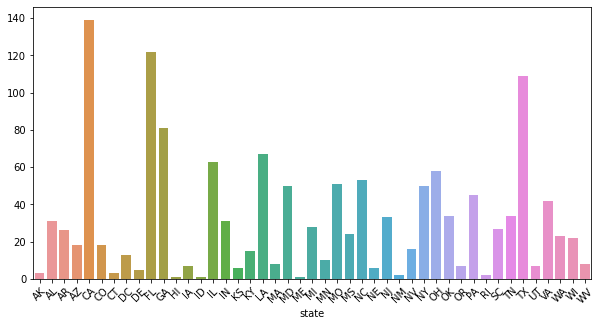

In [31]:
# How did lockdown affect the rate of police killings
plt.figure(figsize=(10, 5))
sns.barplot(y=data[data.race=="B"].groupby("state").size(), x=data[data.race=="B"].groupby("state").size().index)

plt.xticks(rotation=45)

plt.show()
# It will be useful to know which states went on lockdown

# Did protests reduce the rate of police killings

In [32]:
# Enter code here



In [33]:
lockdown.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,geometry,day,month,year
name,,,,,,,,,,,,,,,,,,,
Derrick A. Elseth,2020-01-01,shot,gun,24.0,M,W,Richmond County,VA,False,other,Not fleeing,False,-76.875,38.100,True,POINT (-76.87500 38.10000),1,1,2020
Teddy James Maverick Varner,2020-01-01,shot,gun,29.0,M,W,Central Point,OR,True,attack,Not fleeing,True,-122.993,42.418,True,POINT (-122.99300 42.41800),1,1,2020
Gerardo Antonio Conchas-Bustas,2020-01-01,shot,knife,20.0,M,O,Denver,CO,False,attack,Not fleeing,True,-105.030,39.700,True,POINT (-105.03000 39.70000),1,1,2020
Gabriel Strickland,2020-01-01,shot and Tasered,toy weapon,25.0,M,W,Grass Valley,CA,True,attack,Not fleeing,False,-121.061,39.219,True,POINT (-121.06100 39.21900),1,1,2020
Jeffery Dale Millsap,2020-01-02,shot,gun,26.0,M,W,Holt,MO,False,attack,Car,False,-94.345,39.404,True,POINT (-94.34500 39.40400),2,1,2020


In [34]:
lockdown.state.unique()

array(['VA', 'OR', 'CO', 'CA', 'MO', 'NV', 'IL', 'CT', 'AL', 'FL', 'DE',
       'TX', 'OK', 'NC', 'AZ', 'NM', 'HI', 'AK', 'NY', 'ND', 'OH', 'PA',
       'WA', 'GA', 'IN', 'MT', 'WI', 'AR', 'NJ', 'MD', 'SC', 'KY', 'MS',
       'ME', 'UT', 'KS', 'MA', 'MI', 'LA', 'TN', 'NE', 'ID', 'MN', 'IA',
       'WV', 'NH', 'SD'], dtype=object)

In [35]:
# Some states showed relatively higher rates of death during the pandemic
high_rate_states = data[data.state.isin(["CO", "CT", "FL", "MT", "NV", "AK", "AL"])]

Text(0.5, 1.0, 'The Total Deaths in the First Half of the Year')

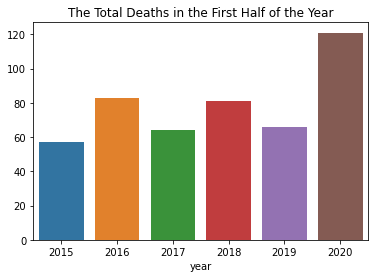

In [36]:
# Did the rate of killings increase during the pandamic 
sns.barplot(y=high_rate_states[high_rate_states.month<=6].groupby("year").size(), x=high_rate_states.groupby("year").size().index)

plt.title("The Total Deaths in the First Half of the Year")

Text(0.5, 1.0, 'WA')

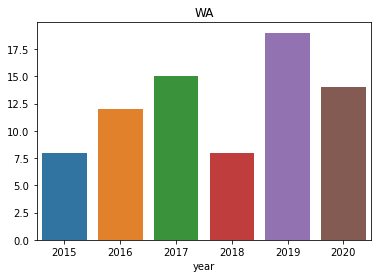

In [37]:
WA = data[data.state=="WA"]
sns.barplot(y=WA[WA.month<=6].groupby("year").size(), x= WA[WA.month<=6].groupby("year").size().index)
plt.title("WA")

NameError: name 'state' is not defined

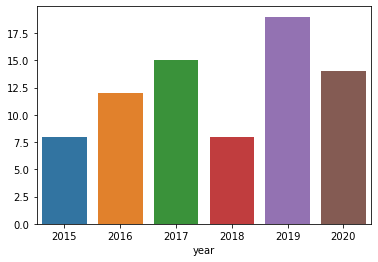

In [38]:
for state_i in list(data.state):
    data_per_state = data[data.state==state_i]
    sns.barplot(y=data_per_state[data_per_state.month<=6].groupby("year").size(), x= data_per_state[data_per_state.month<=6].groupby("year").size().index)
    plt.title(state)

In [39]:
list(data.state)

['WA',
 'OR',
 'KS',
 'CA',
 'CO',
 'OK',
 'AZ',
 'KS',
 'IA',
 'PA',
 'CA',
 'TX',
 'OH',
 'IA',
 'LA',
 'MT',
 'UT',
 'AR',
 'UT',
 'AR',
 'TX',
 'IL',
 'CA',
 'NV',
 'NM',
 'TX',
 'MN',
 'MO',
 'VA',
 'NJ',
 'TX',
 'UT',
 'IN',
 'CO',
 'MN',
 'CA',
 'LA',
 'TX',
 'CA',
 'OK',
 'CA',
 'TX',
 'AZ',
 'KY',
 'MA',
 'AZ',
 'CA',
 'TX',
 'MO',
 'NH',
 'TX',
 'TX',
 'FL',
 'TX',
 'TX',
 'ID',
 'MD',
 'TX',
 'CO',
 'NJ',
 'CO',
 'MN',
 'TX',
 'CA',
 'NE',
 'AZ',
 'AZ',
 'OH',
 'TX',
 'TX',
 'CA',
 'MI',
 'OK',
 'MT',
 'TX',
 'MD',
 'PA',
 'CA',
 'MI',
 'MO',
 'CA',
 'CA',
 'GA',
 'FL',
 'FL',
 'AZ',
 'AZ',
 'TX',
 'TN',
 'CA',
 'OK',
 'CA',
 'NC',
 'AK',
 'TX',
 'NY',
 'FL',
 'TX',
 'ME',
 'TX',
 'TN',
 'CO',
 'WA',
 'CA',
 'AL',
 'CA',
 'KS',
 'PA',
 'TN',
 'AZ',
 'MD',
 'TX',
 'MS',
 'OR',
 'FL',
 'AZ',
 'ID',
 'UT',
 'NC',
 'MO',
 'MI',
 'MA',
 'TX',
 'NC',
 'TX',
 'AL',
 'AL',
 'TX',
 'NM',
 'IN',
 'FL',
 'LA',
 'GA',
 'GA',
 'AL',
 'PA',
 'NE',
 'WI',
 'OK',
 'NV',
 'FL',
 'CA',
 'MS',

# While fatal police shootings remained relatively unchanged during the first six months of 2020,
# crime in general fell across major U.S. cities compared to previous years.

In [40]:
# Find the weekly deaths
lockdown = lockdown.assign(week=lockdown.date.dt.week)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


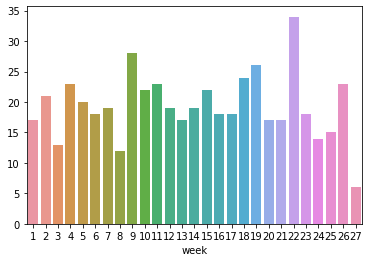

In [41]:
sns.barplot(y=lockdown.groupby("week").size(), x=lockdown.groupby("week").size().index)

In [42]:
lockdown.tail()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,geometry,day,month,year,week
name,,,,,,,,,,,,,,,,,,,,
Wade Russell Meisberger,2020-06-29,shot,gun,48.0,M,W,Hazleton,PA,False,attack,Car,False,-75.979,40.950,True,POINT (-75.97900 40.95000),29,6,2020,27
Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,F,W,Midland,TX,False,other,Other,False,-102.161,31.996,True,POINT (-102.16100 31.99600),29,6,2020,27
Nick Costales,2020-06-29,shot,gun,34.0,M,H,Pomona,CA,True,attack,Car,False,NaN,NaN,True,POINT (nan nan),29,6,2020,27
Kevin Lee Catlett,2020-06-30,shot,gun,62.0,M,W,Johnson City,TN,False,attack,NaN,False,-82.331,36.353,True,POINT (-82.33100 36.35300),30,6,2020,27
Lance A. Bowman,2020-06-30,shot,gun,30.0,M,W,Liberty,MO,False,attack,Car,False,-94.418,39.249,True,POINT (-94.41800 39.24900),30,6,2020,27


In [43]:
data_2020 = data_2020.assign(week=data_2020.date.dt.week)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [44]:
index = data_2020.groupby("week")["date"].min().map(str) + "-" + data_2020.groupby("week")["date"].max().map(str)

In [45]:
index = [i.replace("00:00:00", "") for i in index]

index = [i.replace("2020-", "") for i in index]

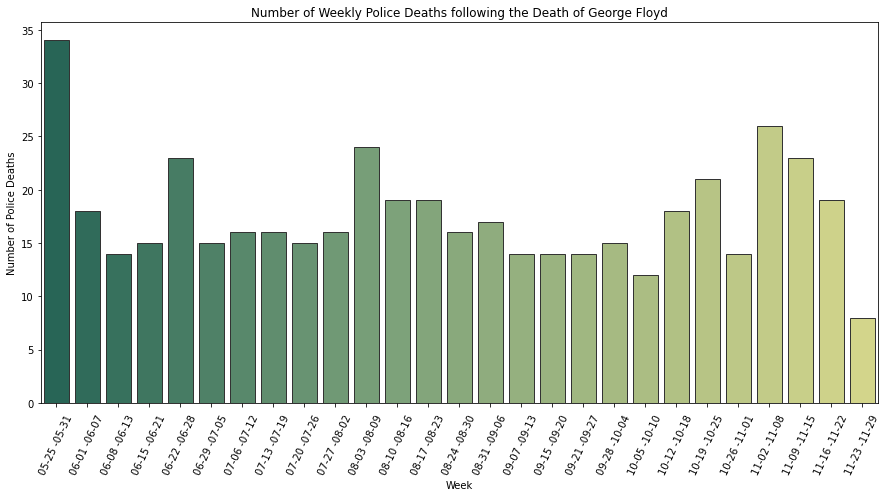

In [46]:
plt.figure(figsize=(15, 7))

sns.barplot(y=data_2020.groupby("week").size()[21:], x=index[21:], palette="summer", saturation=.5, errcolor=".2", edgecolor=".2")

plt.xticks(rotation=65)

plt.title("Number of Weekly Police Deaths following the Death of George Floyd")
plt.ylabel("Number of Police Deaths")
plt.xlabel("Week")

plt.show()

## Geospatial Analysis

In [47]:
filepath = gpd.datasets.get_path("naturalearth_lowres")

world_map = gpd.read_file(filepath)

# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['name']=="United States of America"]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [48]:
US_map = world_map[world_map.name == "United States of America"]

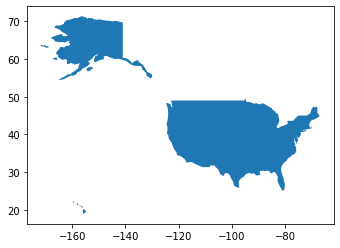

In [49]:
US_map.plot()

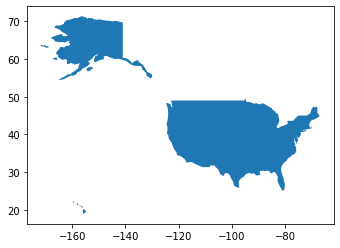

In [50]:
americas.plot()

(20.0, 50.0)

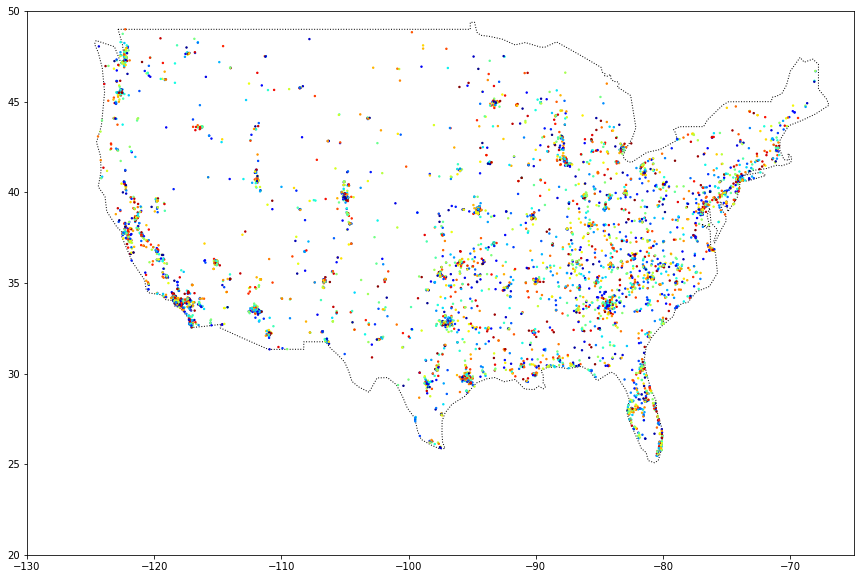

In [51]:
ax = US_map.plot(figsize=(15,10), color='white', linestyle=':', edgecolor='black')
killings.plot(markersize=2, ax=ax, c="race", cmap=plt.get_cmap("jet"))



#To zoom in
ax.set_xlim([-130, -65])
ax.set_ylim([20, 50])

In [52]:
killings.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,geometry
name,,,,,,,,,,,,,,,,,
Tim Elliot,3,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,POINT (-123.12200 47.24700)
Lewis Lee Lembke,4,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,POINT (-122.89200 45.48700)
John Paul Quintero,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,POINT (-97.28100 37.69500)
Matthew Hoffman,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,POINT (-122.42200 37.76300)
Michael Rodriguez,9,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,POINT (-104.69200 40.38400)


In [53]:
US_map.plot?